## Working with Images

**Apa itu Image**
Gambar pada dasarnya adalah matriks nilai piksel. Setiap piksel mewakili warna, dan intensitas warna tersebut ditentukan oleh nilainya. Umumnya, gambar direpresentasikan dalam 3 channel warna: Merah, Hijau, dan Biru (RGB). Bayangkan saja seperti "microsoft excel" yang memiliki baris dan kolom, gambar juga memiliki baris dan kolom, namun dalam kasus ini, setiap sel memiliki nilai yang mewakili warna.


In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 
import os

## Image is Matrix
Image is matrix ayaya

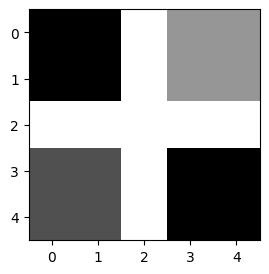

In [16]:
numpy_img_1ch = np.array([
    [0, 0, 255, 150, 150],
    [0, 0, 255, 150, 150],
    [255, 255, 255, 255, 255],
    [80, 80, 255, 0, 0],
    [80, 80, 255, 0, 0],
], dtype=np.uint8)

plt.figure(figsize=(3, 3))
plt.imshow(numpy_img_1ch, cmap='gray')
plt.show()

Channel Merah: 
[[  0   0 255   0   0]
 [  0   0 255   0   0]
 [255 255 255 255 255]
 [  0   0 255   0   0]
 [  0   0 255   0   0]]
Channel Hijau: 
[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]
Channel Biru: 
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


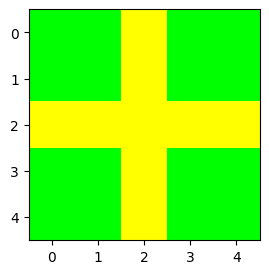

In [17]:
# Create an RGB version of the numpy_img_1ch with a yellow plus sign and green background
numpy_img_rgb = np.zeros((5, 5, 3), dtype=np.uint8)

# Set the background to green
numpy_img_rgb[:, :] = [0, 255, 0]

# Set the plus sign to yellow
numpy_img_rgb[2, :] = [255, 255, 0]
numpy_img_rgb[:, 2] = [255, 255, 0]

print(f"Channel Merah: \n{numpy_img_rgb[:, :, 0]}")
print(f"Channel Hijau: \n{numpy_img_rgb[:, :, 1]}")
print(f"Channel Biru: \n{numpy_img_rgb[:, :, 2]}")

plt.figure(figsize=(3, 3))
plt.imshow(numpy_img_rgb)
plt.show()

## Reading Image


In [18]:
path_gambar1 = os.path.join(os.getcwd(), 'attachment', 'sample-a-img-if4021.jpg')
path_gambar2 = os.path.join(os.getcwd(), 'attachment', 'sample-b-img-if4021.jpg')

# mengecek apakah file gambar ada
# jika tidak ada, akan tercetak pesan "File tidak ditemukan: <path>"
if not os.path.exists(path_gambar1):
    print('File tidak ditemukan:', path_gambar1)
    exit()

## Loading Image with cv2.imread
For loading image with `cv2.imread`, you can use this
- Setup lib `cv2` and `os` and the path
- Load and show with `cv2.imshow`

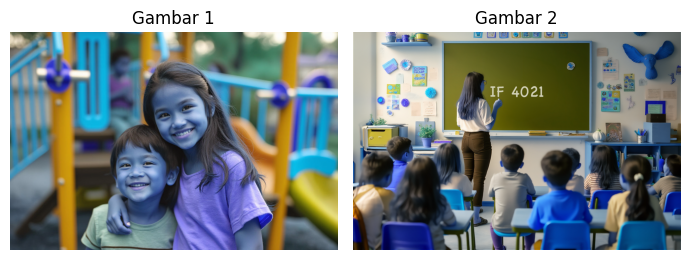

In [19]:
img1 = cv2.imread(path_gambar1)
img2 = cv2.imread(path_gambar2)

ax, fig = plt.subplots(1, 2, figsize=(7, 4))
fig[0].imshow(img1)
fig[0].set_title('Gambar 1')
fig[0].axis('off')
fig[1].imshow(img2)
fig[1].set_title('Gambar 2')
fig[1].axis('off')
plt.tight_layout()
plt.show()

This is happens because of the Image are formated in BGR not RGBm you can convert it later

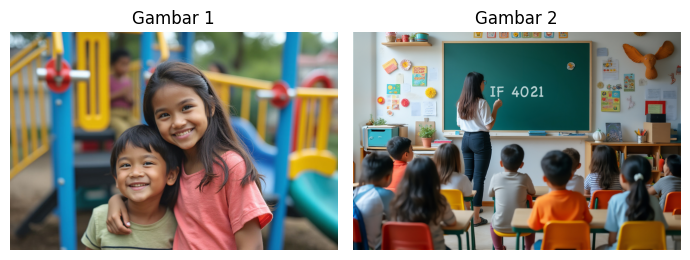

In [20]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

ax, fig = plt.subplots(1, 2, figsize=(7, 4))
fig[0].imshow(img1)
fig[0].set_title('Gambar 1')
fig[0].axis('off')
fig[1].imshow(img2)
fig[1].set_title('Gambar 2')        
fig[1].axis('off')      
plt.tight_layout()
plt.show()

## Working with Pixel Value
Image have value RGB that range from 0 - 255
- Karena kita bekerja dengan gambar 8-bit. Artinya, setiap channel memiliki 8-bit, sehingga rentang nilai yang mungkin adalah 0-255.
- 8 bit berarti warna hitam adalah `00000000` dan warna putih adalah `11111111` atau 0-255 dalam desimal.

Mari melihat isi dari pixel value tersebut. Pertama-tama kita mau mengecek `shape` dari gambar tersebut. `shape` adalah atribut dari numpy array yang menunjukkan dimensi dari array tersebut.

In [21]:
print(f"Mengecek ukuran dimensi gambar: {img1.shape}")

Mengecek ukuran dimensi gambar: (768, 1152, 3)


That image is consist of (row, column and channel). 

Mari coba kita lihat isi dari pixel value tersebut untuk masing-masing channel R, G, dan B pada 5 baris pertama dan 5 kolom pertama.

In [22]:
row5_column5_img1 = img1[0:5, 0:5]
print(f"Isi dari row5_column5_img1:\n{row5_column5_img1}")

Isi dari row5_column5_img1:
[[[131 139 142]
  [118 133 138]
  [104 132 135]
  [ 95 130 134]
  [ 88 126 129]]

 [[124 134 136]
  [111 129 133]
  [102 130 133]
  [ 95 130 134]
  [ 88 126 129]]

 [[116 132 132]
  [108 128 129]
  [102 130 133]
  [ 97 131 133]
  [ 91 126 128]]

 [[116 136 135]
  [107 131 131]
  [103 133 135]
  [101 132 135]
  [ 94 128 130]]

 [[116 143 138]
  [107 136 132]
  [103 133 133]
  [100 131 133]
  [ 93 124 126]]]


Dimensi gambar: (768, 1152, 3)


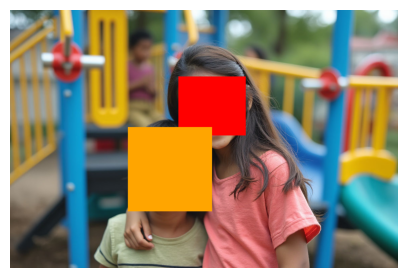

In [23]:
img1 = cv2.imread(path_gambar1) # masih dalam format BGR
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # konversi ke format RGB

merah = [255, 0, 0]
orange = [255, 165, 0]

print(f"Dimensi gambar: {img1.shape}")


x, y , w, h = 500, 200, 200, 175
img1[y:y+h, x:x+w] = merah

x1, y1, x2, y2 = 350, 350, 600, 600
img1[y1:y2, x1:x2] = orange

plt.figure(figsize=(5, 5))
plt.imshow(img1)
plt.axis('off')
plt.show()

## Konversi GrayScale

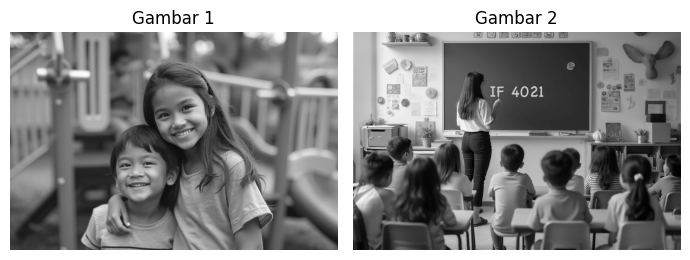

In [24]:
# memuat ulang gambar 1 dan gambar 2
img1 = cv2.imread(path_gambar1) # ingat, gambar yang dimuat masih dalam format BGR
img2 = cv2.imread(path_gambar2)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # konversi ke format Grayscale
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) # konversi ke format Grayscale

ax, fig = plt.subplots(1, 2, figsize=(7, 4))
fig[0].imshow(img1, cmap='gray')
fig[0].set_title('Gambar 1')
fig[0].axis('off')
fig[1].imshow(img2, cmap='gray')
fig[1].set_title('Gambar 2')
fig[1].axis('off')
plt.tight_layout()
plt.show()

## Displaying Histogram
Histrogram is a graph that showing distribution of color inside a image. We're using `cv2.calcHist` to calculate the histogram of that image.

Penjelasan **cv2.calcHist**:

```python
cv2.calcHist(images, channels, mask, histSize, ranges)
```

dimana:
- `images` adalah gambar yang akan dihitung histogramnya
- `channels` adalah channel yang akan dihitung histogramnya
- `mask` adalah mask yang akan digunakan. Jika `None`, maka akan menghitung seluruh gambar
- `histSize` adalah jumlah bit yang akan digunakan. Maksudnya adalah, histogram akan dibagi menjadi beberapa bagian sesuai dengan jumlah bin tersebut.
- `ranges` adalah range nilai yang akan digunakan. Biasanya adalah `(0, 256)` untuk gambar 8-bit.

In [35]:
img1 = cv2.imread(path_gambar1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

histo_red = cv2.calcHist([img1], [0], None, [256], [0, 256])
histo_green = cv2.calcHist([img1], [1], None, [256], [0, 256])
histo_blue = cv2.calcHist([img1], [2], None, [256], [0, 256])

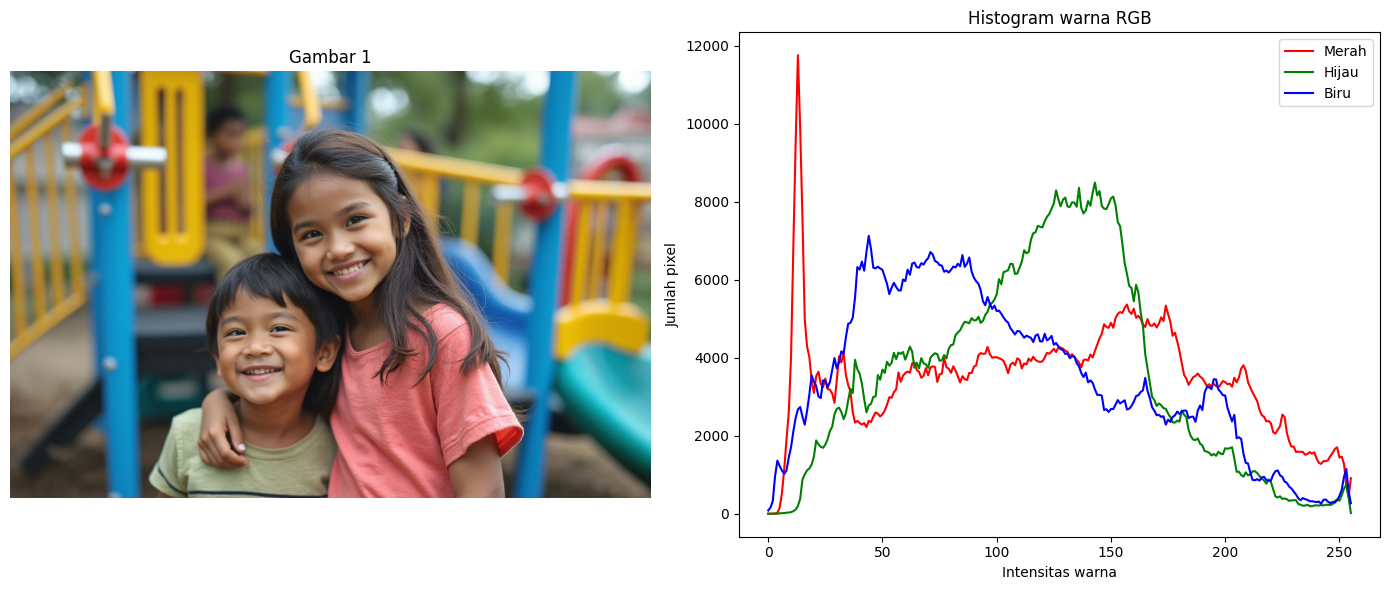

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the actual image
ax[0].imshow(img1)
ax[0].set_title('Gambar 1')
ax[0].axis('off')

# Plot the histogram
ax[1].plot(histo_red, color='red')
ax[1].plot(histo_green, color='green')
ax[1].plot(histo_blue, color='blue')
ax[1].set_title('Histogram warna RGB')
ax[1].set_xlabel('Intensitas warna')
ax[1].set_ylabel('Jumlah pixel')
ax[1].legend(['Merah', 'Hijau', 'Biru'])

plt.tight_layout()
plt.show()

In [ ]:
img1_edit = img1.copy() # kita buat salinan dari img1 agar tidak merubah img1 asli
img1_edit[:,:,0] = img1[:,:,0] * 1.2 # Menaikkan semua nilai pixel pada channel merah sebesar 20%

**Cara Membaca / Menginterpretasi Histogram**
1. Histogram yang tinggi menunjukkan banyaknya piksel pada nilai tersebut.
2. Dalam kasus diatas, channel merah dengan intensitas warna rendah (0-50) memiliki piksel yang lebih banyak dibandingkan dengan channel biru dan hijau. Artinya:
    - Warna merah yang tampil di gambar cenderung lebih gelap.
3. Dalam istilah fotografi, intensitas warna ini dapat dikategorikan sebagai:
    - Black: Intensitas 0 - 50
    - Shadows: Intensitas 50 - 100
    - Midtones: Intensitas 100 - 150
    - Highlights: Intensitas 150 - 200
    - White: Intensitas 200 - 255

**Mari kita coba untuk menaikkan intensitas warna hanya pada channel merah.**



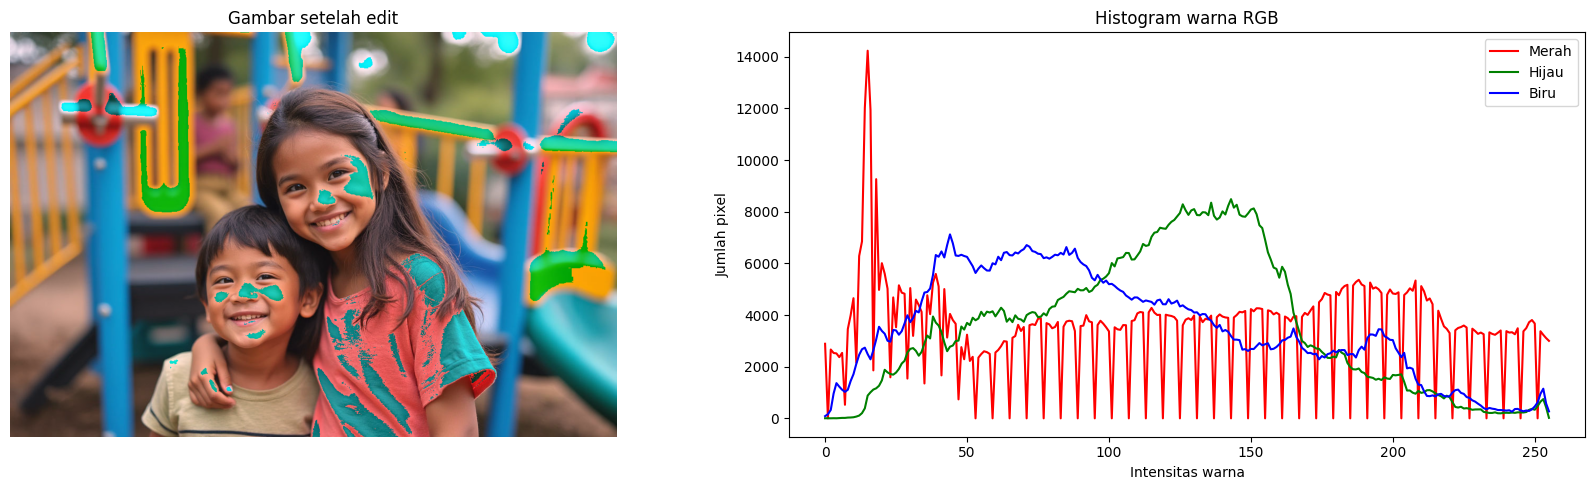

In [38]:
img1_edit = img1.copy() # kita buat salinan dari img1 agar tidak merubah img1 asli
img1_edit[:,:,0] = img1[:,:,0] * 1.2 # Menaikkan semua nilai pixel pada channel merah sebesar 20%

histo_img1_red_edit = cv2.calcHist([img1_edit], [0], None, [256], [0, 256])
histo_img1_green_edit = cv2.calcHist([img1_edit], [1], None, [256], [0, 256])
histo_img1_blue_edit = cv2.calcHist([img1_edit], [2], None, [256], [0, 256])

ax, fig = plt.subplots(1, 2, figsize=(17, 5))
fig[0].imshow(img1_edit)
fig[0].axis('off')
fig[0].set_title('Gambar setelah edit')
fig[1].plot(histo_img1_red_edit, color='red')
fig[1].plot(histo_img1_green_edit, color='green')
fig[1].plot(histo_img1_blue_edit, color='blue')
fig[1].set_title('Histogram warna RGB')
fig[1].set_xlabel('Intensitas warna')
fig[1].set_ylabel('Jumlah pixel')
fig[1].legend(['Merah', 'Hijau', 'Biru'])
plt.tight_layout()
plt.show()

## Increase the intensity without disturb the image

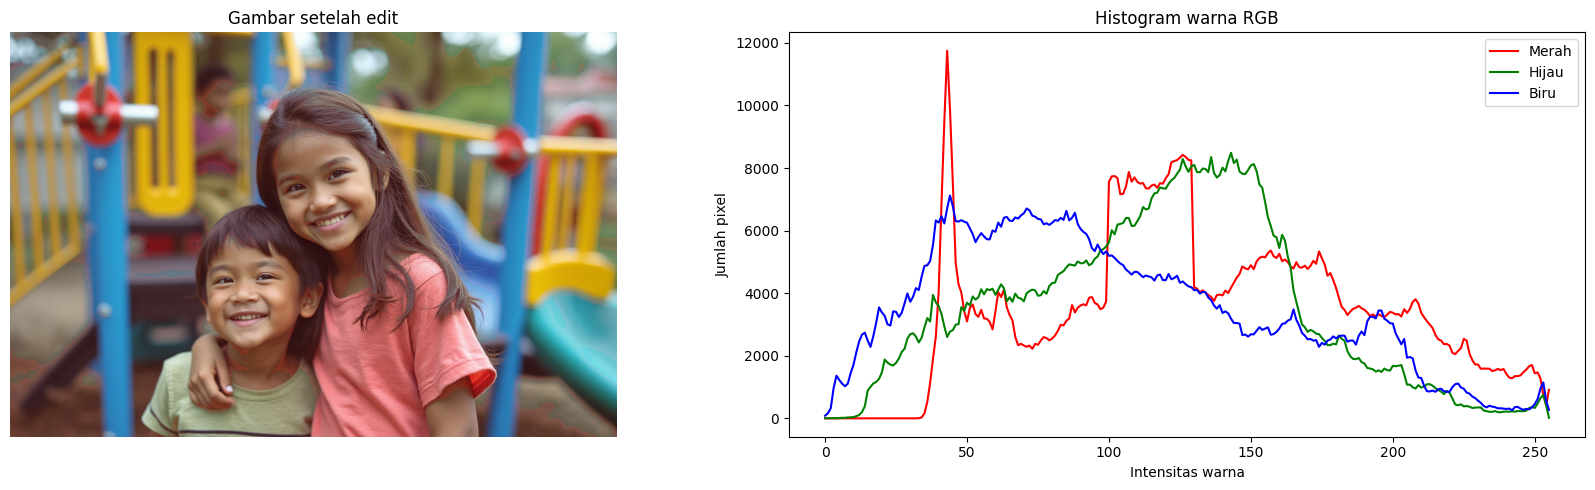

In [39]:
img1_edit = img1.copy() # kita buat salinan dari img1 agar tidak merubah img1 asli

for row in range(img1_edit.shape[0]):
    for col in range(img1_edit.shape[1]):
        
        if img1_edit[row, col, 0] < 100:
            img1_edit[row, col, 0] = img1_edit[row, col, 0] + 30

histo_img1_red_edit = cv2.calcHist([img1_edit], [0], None, [256], [0, 256])
histo_img1_green_edit = cv2.calcHist([img1_edit], [1], None, [256], [0, 256])
histo_img1_blue_edit = cv2.calcHist([img1_edit], [2], None, [256], [0, 256])

ax, fig = plt.subplots(1, 2, figsize=(17, 5))
fig[0].imshow(img1_edit)
fig[0].axis('off')
fig[0].set_title('Gambar setelah edit')
fig[1].plot(histo_img1_red_edit, color='red')
fig[1].plot(histo_img1_green_edit, color='green')
fig[1].plot(histo_img1_blue_edit, color='blue')
fig[1].set_title('Histogram warna RGB')
fig[1].set_xlabel('Intensitas warna')
fig[1].set_ylabel('Jumlah pixel')
fig[1].legend(['Merah', 'Hijau', 'Biru'])
plt.tight_layout()
plt.show()

Bruh

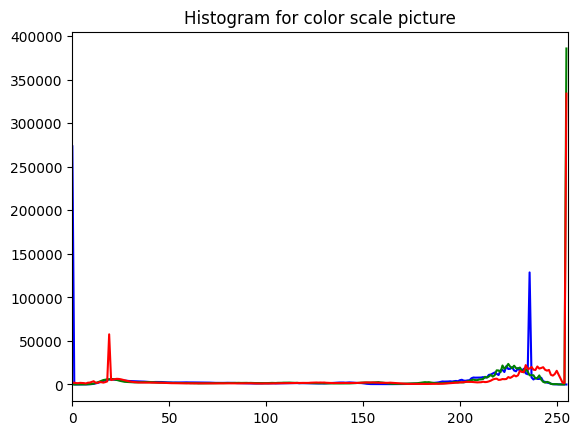

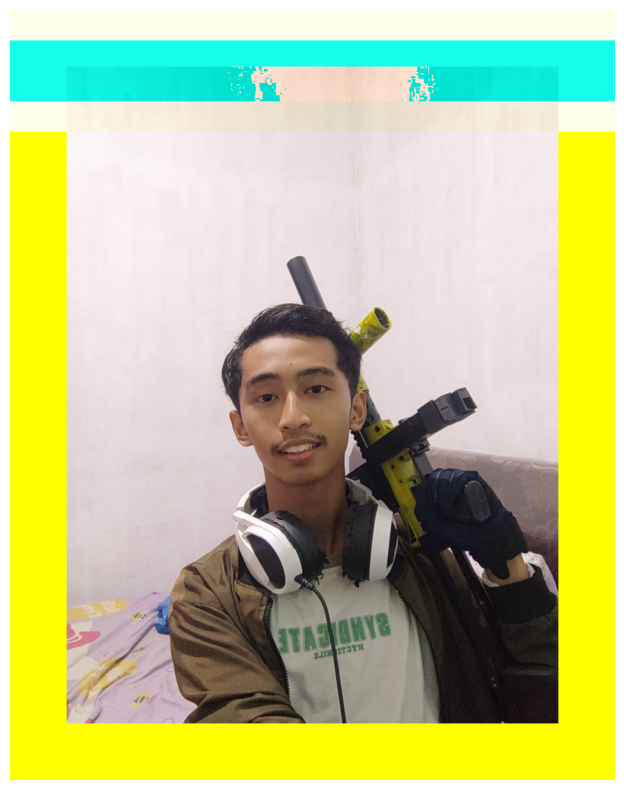

In [40]:
# Load the image
image_path = 'attachment/sample.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Resize the image
height, width = image.shape[:2]
max_dimension = max(height, width)
scale = 1080 / max_dimension
new_size = (int(width * scale), int(height * scale))
resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

# Add yellow frame
NIM_last_two_digits = 68  # Replace with your NIM's last two digits
frame_thickness = 25 + NIM_last_two_digits
yellow = (0, 255, 255)
framed_image = cv2.copyMakeBorder(resized_image, frame_thickness, frame_thickness, frame_thickness, frame_thickness, cv2.BORDER_CONSTANT, value=yellow)

# Adjust red channel intensity in the middle region
middle_region = framed_image[50:150, :, 2]
middle_region = np.clip(middle_region + 20, 0, 255)
framed_image[50:150, :, 2] = middle_region

# Decrease blue channel intensity in the top region
top_region = framed_image[:200, :, 0]
top_region = np.clip(top_region - 20, 0, 255)
framed_image[:200, :, 0] = top_region

# Display the histogram
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    histogram = cv2.calcHist([framed_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.title('Histogram for color scale picture')
plt.show()

# Display the edited image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(framed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

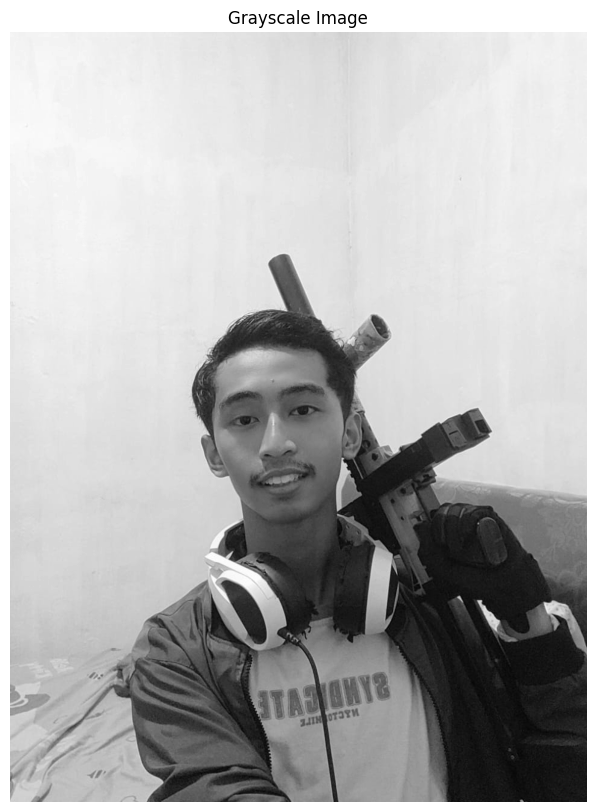

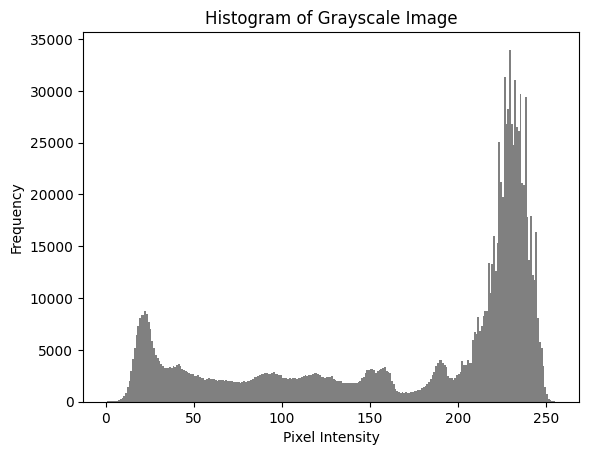

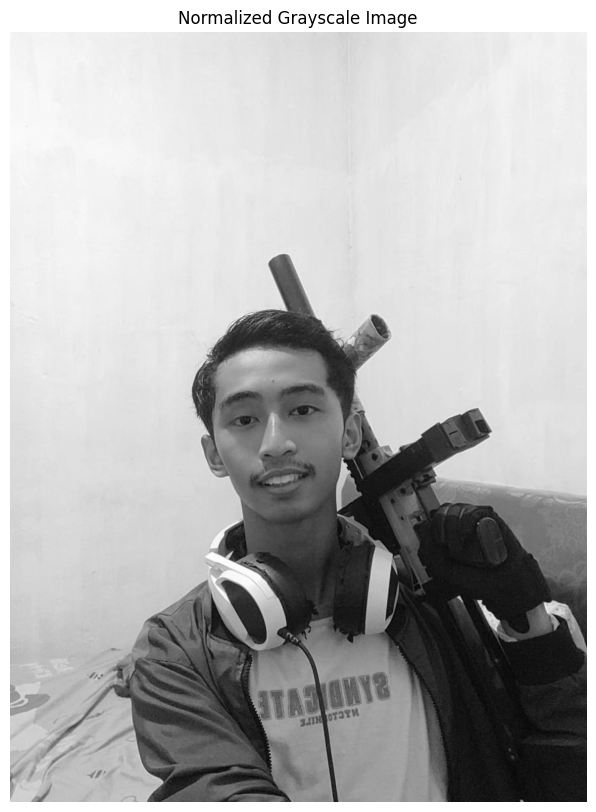

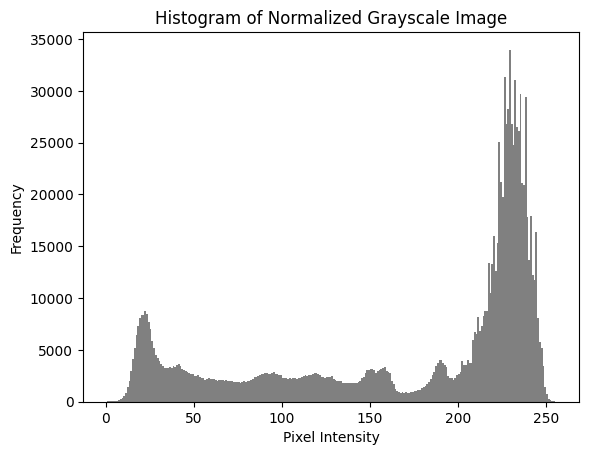

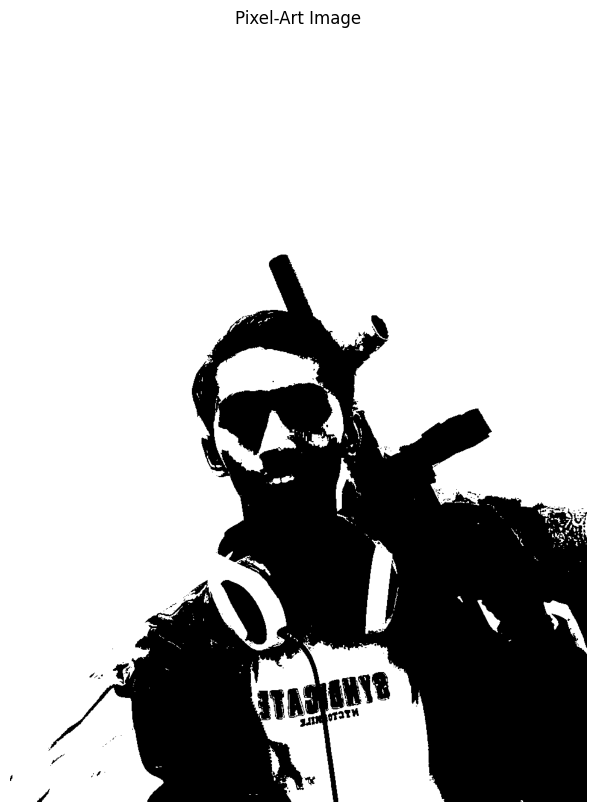

In [28]:
# Convert image from RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(10, 10))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

# Display the histogram of the grayscale image
plt.figure()
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Normalize the intensity levels of the grayscale image
normalized_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)

# Display the normalized image
plt.figure(figsize=(10, 10))
plt.imshow(normalized_image, cmap='gray')
plt.axis('off')
plt.title('Normalized Grayscale Image')
plt.show()

# Display the histogram of the normalized image
plt.figure()
plt.hist(normalized_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Normalized Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Create pixel-art from the normalized image
pixel_art_image = np.where(normalized_image < 128, 0, 255).astype(np.uint8)

# Display the pixel-art image
plt.figure(figsize=(10, 10))
plt.imshow(pixel_art_image, cmap='gray')
plt.axis('off')
plt.title('Pixel-Art Image')
plt.show()

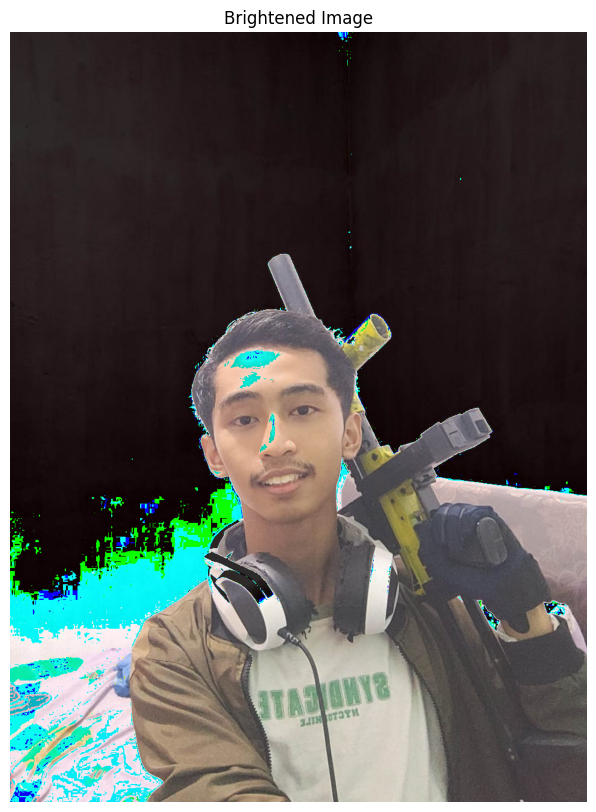

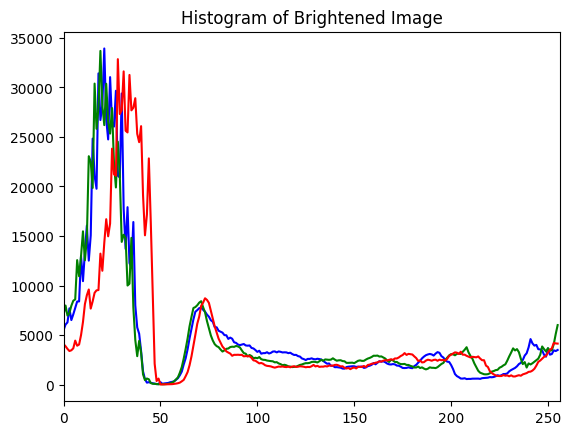

In [29]:
# Increase brightness
brightness_increase = 50  # You can adjust this value
bright_image = np.clip(image + brightness_increase, 0, 255).astype(np.uint8)

# Display the brightened image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Brightened Image')
plt.show()

# Display the histogram of the brightened image
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    histogram = cv2.calcHist([bright_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.title('Histogram of Brightened Image')
plt.show()